## 线性回归

### 一.手写算法

load_diabetes数据集：糖尿病数据集  
442个病人的生理数据以及一年后的病情发展情况  

##### 手写算法过程  
1.初始化系数项  
2.编写模型参数计算函数  
3.编写迭代函数  
4.编写预测函数  
5.编写结果评价函数  
6.编写交叉验证的函数  

##### 使用手写算法的过程  
1.导入数据  
2.分离数据集  
3.训练模型，返回参数  
4.使用预测函数  
5.对预测结果做评价  
6.绘制预测结果图  
7.绘制评价图  
8.进行交叉验证查看结果  

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

##### 1.初始化维度（系数项）与截距项
输入：  
dims：训练数据变量维度  

输出：  
w：初始化权重参数值  
b：初始化偏差参数值  

In [3]:
### 初始化模型参数
def initialize_params(dims):
    w = np.zeros((dims, 1)) # 初始化权重参数为零矩阵
    b = 0    # 初始化偏差参数为零
    return w, b

##### 2.模型主体
输入:  
X：输入变量矩阵  
y：输出标签向量  
w：变量参数权重矩阵  
b：偏差项  

输出：  
y_hat：线性模型预测输出  
loss：均方损失值  
dw：权重参数一阶偏导  
db：偏差项一阶偏导  

In [4]:
### 定义模型主体部分
### 包括线性回归公式、均方损失和参数偏导三部分
def linear_loss(X, y, w, b):
    num_train = X.shape[0]                  # 训练样本数量
    num_feature = X.shape[1]                # 训练特征数量
    y_hat = np.dot(X, w) + b                # 线性回归预测输出
    loss = np.sum((y_hat-y)**2)/num_train   # 计算预测输出与实际标签之间的均方损失
    dw = np.dot(X.T, (y_hat-y)) /num_train  # 基于均方损失对权重参数的一阶偏导数
    db = np.sum((y_hat-y)) /num_train       # 基于均方损失对偏差项的一阶偏导数
    return y_hat, loss, dw, db

##### 3.训练过程
输入：  
X：输入变量矩阵  
y：输出标签向量  
learning_rate：学习率  
epochs：训练迭代次数  

输出：  
loss_his：每次迭代的均方损失  
params：优化后的参数字典  
grads：优化后的参数梯度字典  

In [5]:
### 定义线性回归模型训练过程
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    loss_his = []  # 记录训练损失的空列表
    w, b = initialize_params(X.shape[1]) # 初始化模型参数
    for i in range(1, epochs):          # 迭代训练
        y_hat, loss, dw, db = linear_loss(X, y, w, b)         # 计算当前迭代的预测值、损失和梯度
        w += -learning_rate * dw            # 基于梯度下降的参数更新
        b += -learning_rate * db
        loss_his.append(loss)                # 记录当前迭代的损失
        if i % 10000 == 0:                  # 每1000次迭代打印当前损失信息
            print('epoch %d loss %f' % (i, loss))
        params = {'w': w,  'b': b}         # 将当前迭代步优化后的参数保存到字典
        grads = {'dw': dw,  'db': db}      # 将当前迭代步的梯度保存到字典
    return loss_his, params, grads

导入并查看数据  

In [6]:
# 导入数据
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


导入并分离数据集  

In [7]:
# 导入sklearn.diabetes数据接口
from sklearn.datasets import load_diabetes

from sklearn.utils import shuffle            # 导入sklearn打乱数据函数
diabetes = load_diabetes()                    # 获取diabetes数据集
data, target = diabetes.data, diabetes.target # 获取输入和标签
X, y = shuffle(data, target, random_state=13) # 打乱数据集
offset = int(X.shape[0] * 0.8)                # 按照8/2划分训练集和测试集
X_train, y_train = X[:offset], y[:offset]     # 训练集
X_test, y_test = X[offset:], y[offset:]       # 测试集
y_train = y_train.reshape((-1,1))             # 将训练集改为列向量的形式
y_test = y_test.reshape((-1,1))               # 将验证集改为列向量的形式

# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ",  X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ",  y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


训练模型  

In [8]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3679.868273
epoch 20000 loss 3219.164522
epoch 30000 loss 3040.820279
epoch 40000 loss 2944.936608
epoch 50000 loss 2885.991571
epoch 60000 loss 2848.051813
epoch 70000 loss 2823.157085
epoch 80000 loss 2806.627821
epoch 90000 loss 2795.546917
epoch 100000 loss 2788.051561
epoch 110000 loss 2782.935842
epoch 120000 loss 2779.411265
epoch 130000 loss 2776.957989
epoch 140000 loss 2775.230803
epoch 150000 loss 2773.998942
epoch 160000 loss 2773.107192
epoch 170000 loss 2772.450534
epoch 180000 loss 2771.957489
epoch 190000 loss 2771.579121
{'w': array([[  10.56390075],
       [-236.41625133],
       [ 481.50915635],
       [ 294.47043558],
       [ -60.99362023],
       [-110.54181897],
       [-206.44046579],
       [ 163.23511378],
       [ 409.28971463],
       [  65.73254667]]), 'b': 150.8144748910088}


##### 4.线性回归的预测函数
输入：  
X：测试数据集  
params：模型训练参数  

输出：  
y_pred：模型预测结果  

In [9]:
### 定义线性回归预测函数
def predict(X, params):
    # 获取模型参数
    w = params['w']
    b = params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred

In [10]:
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
print(y_pred[:5])
# 打印前5个实际值
print(y_test[:5])

[[ 82.0537503 ]
 [167.22420149]
 [112.38335719]
 [138.15504748]
 [174.71840809]]
[[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


##### 5.计算决定系数R2
输入：  
y_test：测试集标签值  
y_pred：测试集预测值  

输出：  
r2：R2系数  

In [11]:
### 定义R2系数函数
def r2_score(y_test, y_pred):
    # 测试标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    # R2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2

# 计算并打印决定系数R2
print(r2_score(y_test, y_pred))

0.5334188457463576


绘图

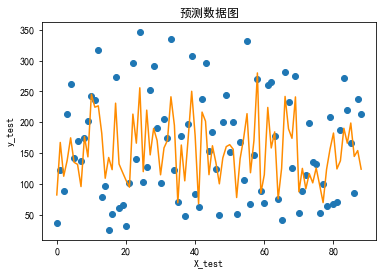

In [12]:
# 绘图
# 散点部分：测试数据的真实值
# 折线部分：测试数据的预测值
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test) # 散点部分，真实值
plt.plot(f, color = 'darkorange')           # 折线部分，预测值
plt.xlabel('X_test')                        # X轴没有实际意义
plt.ylabel('y_test')
plt.title("预测数据图")
plt.show()

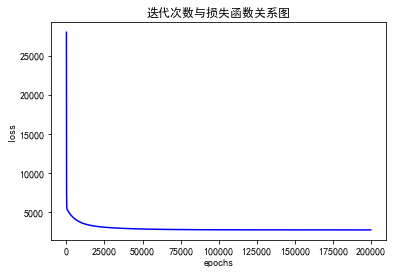

In [13]:
# 绘制迭代次数与损失函数关系图
plt.plot(loss_his, color = 'blue')
plt.xlabel('epochs') # 迭代次数
plt.ylabel('loss') # 损失函数走势
plt.title("迭代次数与损失函数关系图")
plt.show()

In [14]:
# 打散数据
from sklearn.utils import shuffle
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
data = np.concatenate((X, y.reshape((-1,1))), axis=1)
data.shape

(442, 11)

##### 6.编写交叉验证的函数

In [15]:
from random import shuffle
def k_fold_cross_validation(items, k, randomize=True):
    if randomize:
        items = list(items)
        shuffle(items)

    slices = [items[i::k] for i in range(k)]

    for i in range(k):
        validation = slices[i]
        training = [item
                    for s in slices if s is not validation
                    for item in s]
        training = np.array(training)
        validation = np.array(validation)
        yield training, validation

In [16]:
for training, validation in k_fold_cross_validation(data, 5): 
    # 训练集，分离变量和标签
    X_train = training[:, :10]
    y_train = training[:, -1].reshape((-1,1))
    # 测试集，分离变量和标签
    X_valid = validation[:, :10]
    y_valid = validation[:, -1].reshape((-1,1))
    print("查看数据信息：")
    print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)
    
    loss5 = []
    loss, params, grads = linear_train(X_train, y_train, 0.001, 100000) # linear_train拼写错了
    loss5.append(loss)
    score = np.mean(loss5)
    print('five kold cross validation score is', score)  # 5折交叉验证得分
    
    y_pred = predict(X_valid, params)
    valid_score = np.sum(((y_pred - y_valid)**2))/len(X_valid)
    print('valid score is', valid_score)
    print()

查看数据信息：
(353, 10) (353, 1) (89, 10) (89, 1)
epoch 10000 loss 5815.845188
epoch 20000 loss 5505.676275
epoch 30000 loss 5238.827464
epoch 40000 loss 5008.686747
epoch 50000 loss 4809.680136
epoch 60000 loss 4637.107269
epoch 70000 loss 4487.003160
epoch 80000 loss 4356.021884
epoch 90000 loss 4241.338730
five kold cross validation score is 5042.0776459132
valid score is 3043.56351531415

查看数据信息：
(353, 10) (353, 1) (89, 10) (89, 1)
epoch 10000 loss 5608.063946
epoch 20000 loss 5314.862891
epoch 30000 loss 5062.576482
epoch 40000 loss 4844.889549
epoch 50000 loss 4656.495725
epoch 60000 loss 4492.934455
epoch 70000 loss 4350.454472
epoch 80000 loss 4225.899396
epoch 90000 loss 4116.611882
five kold cross validation score is 4878.787335239086
valid score is 3666.5169458759674

查看数据信息：
(354, 10) (354, 1) (88, 10) (88, 1)
epoch 10000 loss 5530.764423
epoch 20000 loss 5198.587065
epoch 30000 loss 4917.108330
epoch 40000 loss 4677.881748
epoch 50000 loss 4473.906565
epoch 60000 loss 4299.37822

### 二.使用sklearn实现算法

##### 1.导入数据并查看数据信息

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)
y = y.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印基本的数据信息
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353, 1) (89, 10) (89, 1)


##### 2.使用linear_model做模型

Coefficients: 
 [[ -23.510416 -216.31226   472.3673    372.0716   -863.6972    583.2743
   105.79283   194.7696    754.07294    38.22233 ]]
Mean squared error: 3028.50
Variance score: 0.53
0.5298200066003529


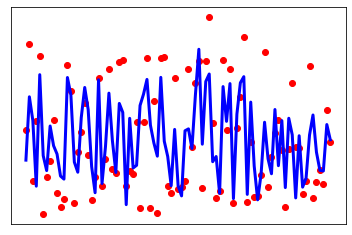

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(range(X_test.shape[0]), y_test, color='red')
plt.plot(range(X_test.shape[0]), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show();

##### 3.使用sklearn做交叉验证

In [19]:
import numpy as np
import pandas as pd 
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

### 交叉验证
def cross_validate(model, x, y, folds=5, repeats=5):
    
    ypred = np.zeros((len(y),repeats))
    score = np.zeros(repeats)
    for r in range(repeats):
        i=0
        print('Cross Validating - Run', str(r + 1), 'out of', str(repeats))
        x,y = shuffle(x, y, random_state=r) #shuffle data before each repeat
        # kf = KFold(n_splits=folds,random_state=i+1000) #random split, different each time
        kf = KFold(n_splits=folds,random_state=i+1000, shuffle=True) #random split, different each time
        for train_ind, test_ind in kf.split(x):
            print('Fold', i+1, 'out of', folds)
            xtrain,ytrain = x[train_ind,:],y[train_ind]
            xtest,ytest = x[test_ind,:],y[test_ind]
            model.fit(xtrain, ytrain)
            #print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)
            ypred[test_ind]=model.predict(xtest)
            i+=1
        # score[r] = R2(ypred[:,r],y)
        score[r] = r2_score(ypred[:,r],y)
    print('\nOverall R2:',str(score))
    print('Mean:',str(np.mean(score)))
    print('Deviation:',str(np.std(score)))
    pass

cross_validate(regr, X, y, folds=5, repeats=5)

Cross Validating - Run 1 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 2 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 3 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 4 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5
Cross Validating - Run 5 out of 5
Fold 1 out of 5
Fold 2 out of 5
Fold 3 out of 5
Fold 4 out of 5
Fold 5 out of 5

Overall R2: [0.03209453 0.04484115 0.02542745 0.01093119 0.02690178]
Mean: 0.028039219103183764
Deviation: 0.010950345198271193
